In [1]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('errors.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['fx_1101_fy_1101_cx_639.5_cy_359.5', 'fx_743.8620050007855_fy_742.2062160636718_cx_608.5171702689746_cy_359.81965200680577', 'fx_746.940651540898_fy_745.8870776888849_cx_678.4442725584279_cy_360.4879650448248'])


In [3]:
camera1 = data['fx_1101_fy_1101_cx_639.5_cy_359.5']
camera2 = data['fx_743.8620050007855_fy_742.2062160636718_cx_608.5171702689746_cy_359.81965200680577']
camera3 = data['fx_746.940651540898_fy_745.8870776888849_cx_678.4442725584279_cy_360.4879650448248']

In [4]:
sample_size = np.arange(10, 25+1)
mean1, std1 = np.mean(camera1, axis=1), np.std(camera1, axis=1)
mean2, std2 = np.mean(camera2, axis=1), np.std(camera2, axis=1)
mean3, std3 = np.mean(camera3, axis=1), np.std(camera3, axis=1)

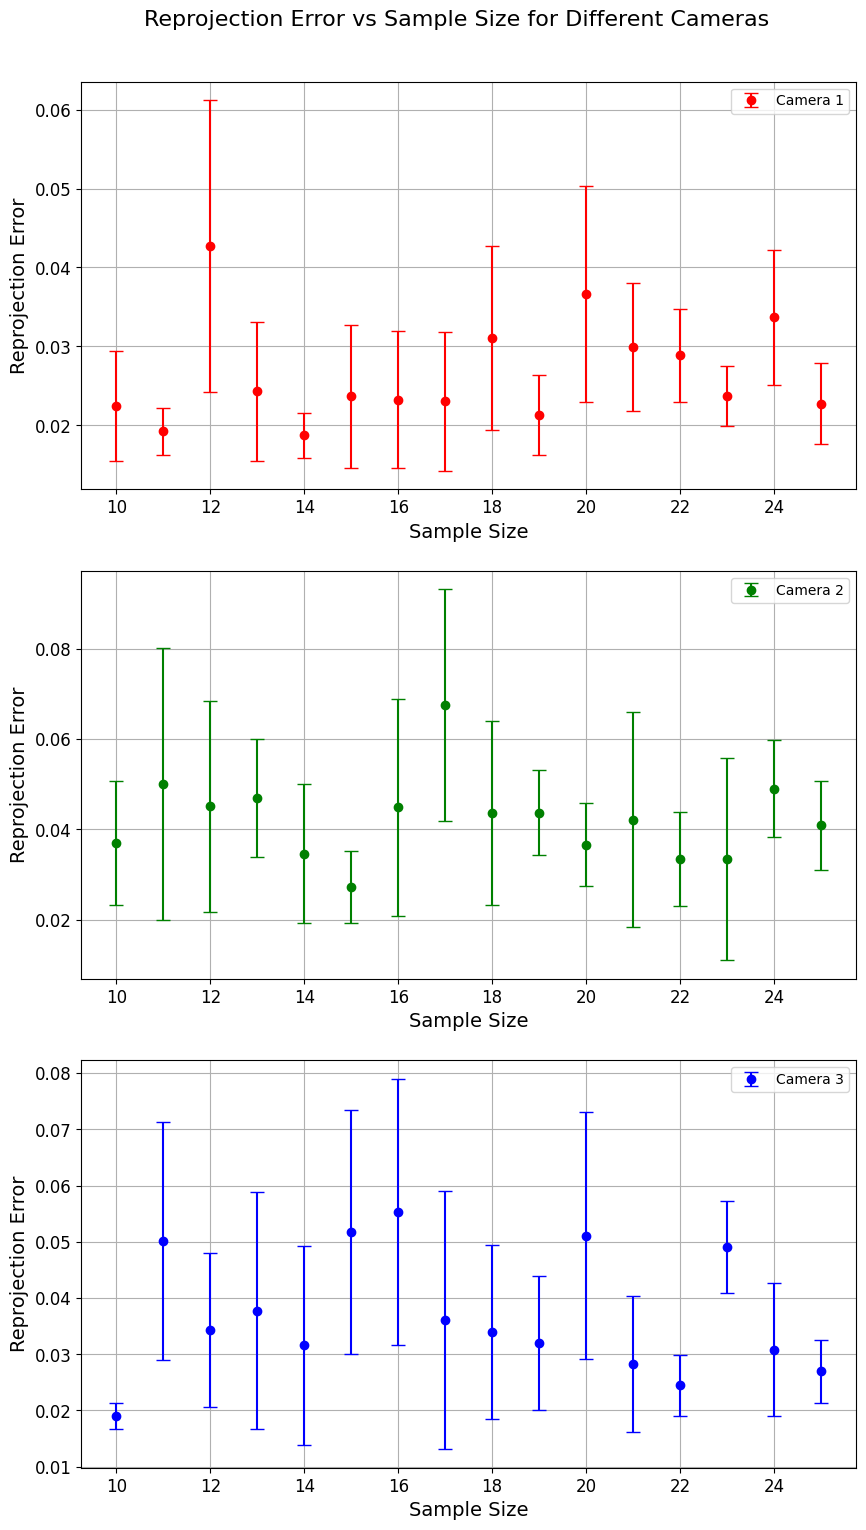

In [70]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # Create 3 subplots, one below the other

# Plot the error bars for each data set on a different subplot
axs[0].errorbar(sample_size, mean1, std1, linestyle='None', marker='o', color='r', label='Camera 1', capsize=5)
axs[1].errorbar(sample_size, mean2, std2, linestyle='None', marker='o', color='g', label='Camera 2', capsize=5)
axs[2].errorbar(sample_size, mean3, std3, linestyle='None', marker='o', color='b', label='Camera 3', capsize=5)

# Add labels and titles to each subplot
for i in range(3):
    axs[i].set_xlabel("Sample Size", fontsize=14)
    axs[i].set_ylabel("Reprojection Error", fontsize=14)
    axs[i].legend(loc='best')
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].grid(True)

# Add a main title to the figure
fig.suptitle('Reprojection Error vs Sample Size for Different Cameras', fontsize=16, y=0.92)

plt.show()


## Noise results

In [90]:
with open('noise_results.pkl', 'rb') as f:
    noise_data = pickle.load(f)
keys = noise_data.keys()
arrays = noise_data.values()

# for key in keys:
#     print(key)
# print(len(arrays))
projection_errors = []
fx = []
fy = []
cx = []
cy = []
for array in arrays:
    projection_errors.append(array[0])
    fx.append(array[1][0,0])
    fy.append(array[1][1,1])
    cx.append(array[1][0,2])
    cy.append(array[1][1,2])

projection_errors = np.array(projection_errors)
print(projection_errors)
projection_errors = (projection_errors.reshape(3,-1)).reshape(3,4,5)

fx = np.array(fx)
fx = (fx.reshape(3,-1)).reshape(3,4,5)


fy = np.array(fy)
fy = (fy.reshape(3,-1)).reshape(3,4,5)


cx = np.array(cx)
cx = (cx.reshape(3,-1)).reshape(3,4,5)

cy = np.array(cy)
cy = (cy.reshape(3,-1)).reshape(3,4,5)

[0.01825818 0.01826911 0.01829304 0.0183069  0.0183221  0.01670929
 0.01672873 0.01682465 0.01687624 0.01701963 0.01624676 0.01628333
 0.01634294 0.01648237 0.01665056 0.01646631 0.01654249 0.01661601
 0.01669017 0.01704046 0.04341846 0.04337798 0.0441033  0.04340458
 0.04325333 0.02236529 0.02213829 0.02234809 0.02196331 0.01880321
 0.02341118 0.01844085 0.01852754 0.01849594 0.01860203 0.01804807
 0.01825863 0.01811874 0.01848062 0.01838761 0.01669195 0.01671214
 0.01672325 0.01674028 0.01675325 0.01538548 0.01542413 0.01550423
 0.01560223 0.01566211 0.01512806 0.01517556 0.01524149 0.01539588
 0.01548051 0.01493821 0.01495627 0.01501187 0.01523957 0.01537363]


In [87]:
print(projection_errors[0,:,:])

[[0.01825818 0.01826911 0.01829304 0.0183069  0.0183221 ]
 [0.01670929 0.01672873 0.01682465 0.01687624 0.01701963]
 [0.01624676 0.01628333 0.01634294 0.01648237 0.01665056]
 [0.01646631 0.01654249 0.01661601 0.01669017 0.01704046]]


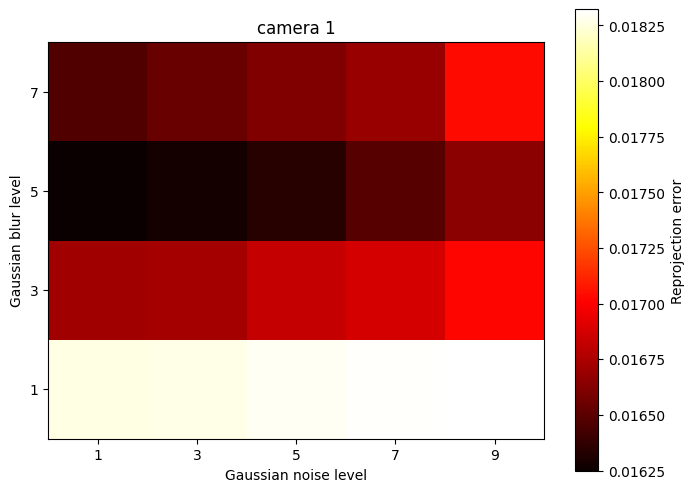

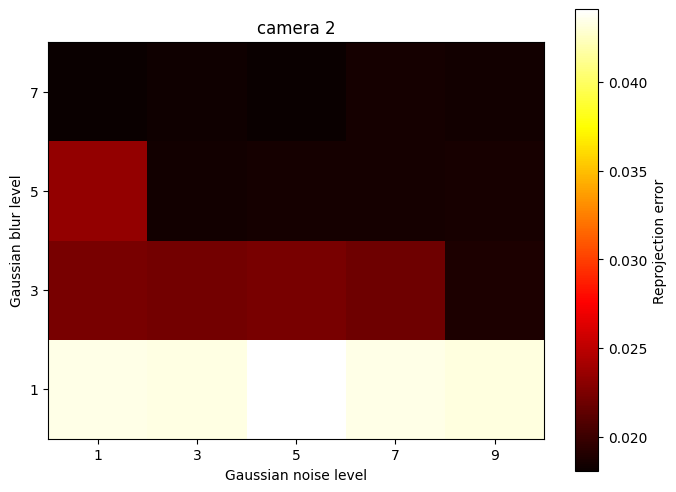

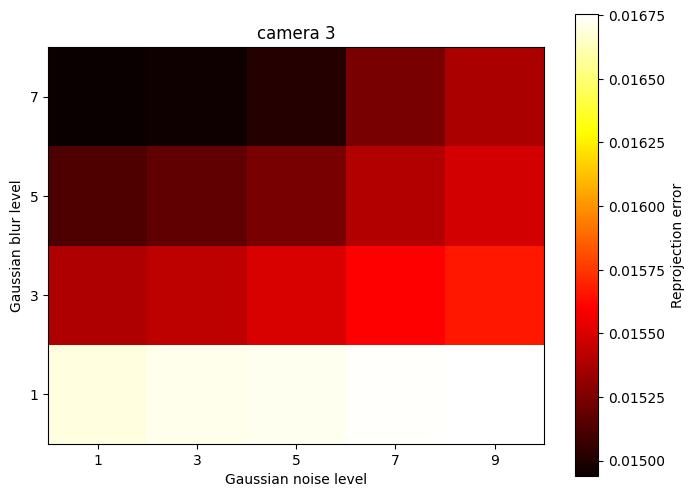

In [89]:

dim_two = np.array([1, 3, 5, 7, 9])
dim_one = np.array([1, 3, 5, 7])

for i in range(projection_errors.shape[0]):
    plt.figure(figsize=(8, 6))  
    plt.imshow(projection_errors[i, :, :], cmap='hot', interpolation='nearest')
    plt.colorbar(label='Reprojection error')  

    # Set x-axis and y-axis values
    plt.xticks(np.arange(len(dim_two)), dim_two)
    plt.yticks(np.arange(len(dim_one)), dim_one)
    plt.ylabel("Gaussian blur level")
    plt.xlabel("Gaussian noise level")
    
    plt.gca().invert_yaxis()
    plt.title(f'camera {i+1}')  
    plt.show()